# Demo for Woods-Saxon potential
### The 1D Hamiltonian is solved numerically for a the Woods-Saxon potential.

In [2]:
from _ham import Hamiltonian
import numpy as np


In [3]:

def woods_saxon_potential(V_zero, A, a_ws, r_zero, x):
    radius = r_zero * A ** (1 / 3)
    return -V_zero / (1 + np.exp((np.abs(x) - radius) / a_ws))

In [4]:
length = 120
n_steps = 501
ham_ws = Hamiltonian(length,n_steps)


In [5]:
# Set parameters for Woods-Saxon Potential 
V_zero = 1
A = 50
a_ws = 0.5
r_zero = 1.25
ham_ws.build_hamiltonian(lambda x: woods_saxon_potential(V_zero, A, a_ws,r_zero, x))

In [6]:
ham_ws.diagonalize()


In [7]:
delta_neg, delta_pos, kvals_neg, kvals_pos = ham_ws.calc_scatter_phases()


missing wave function


## Results

###  Square modulus of the bound states (shifted by corresponding energy value)

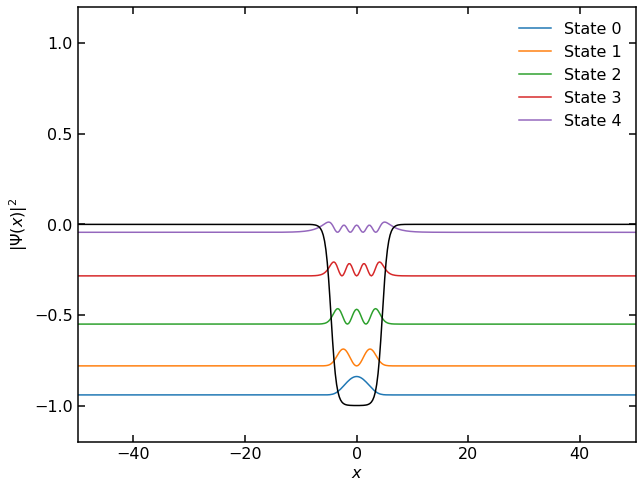

In [9]:
import matplotlib.pyplot as plt
plt.style.use('scientific.mplstyle')
plt.figure(figsize=(10,8))
for i in range(5):
    plt.plot( ham_ws.x_values,ham_ws.eigvals[i]+2*ham_ws.eigvecs[:,i]**2, label =f'State {i}')
# plt.plot(ham_ws.x_values,ham_ws.eigvecs[:,0]**2)
# plt.plot(ham_ws.x_values,ham_ws.eigvals[2] + ham_ws.eigvecs[:,2]**2)
plt.plot(ham_ws.x_values,woods_saxon_potential(V_zero, A, a_ws,r_zero, ham_ws.x_values), color='black')

plt.xlabel('$x$'), plt.ylabel('$|\Psi(x)|^2$')
plt.ylim(-1.2,1.2)
plt.xlim(-50,50)
plt.legend()
plt.show()

###  Square modulus of the first 5 scatter states (shifted by corresponding energy value)

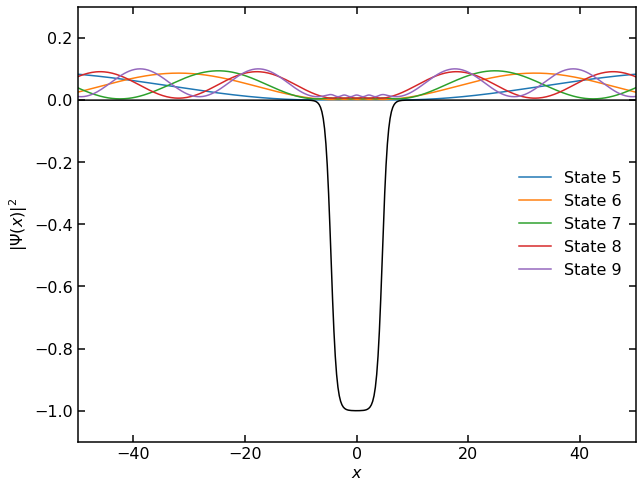

In [11]:
plt.figure(figsize=(10,8))
for i in range(5,10):
    plt.plot( ham_ws.x_values,ham_ws.eigvals[i]+20*ham_ws.eigvecs[:,i]**2, label =f'State {i}')
# plt.plot(ham_ws.x_values,ham_ws.eigvecs[:,0]**2)
# plt.plot(ham_ws.x_values,ham_ws.eigvals[2] + ham_ws.eigvecs[:,2]**2)
plt.plot(ham_ws.x_values,woods_saxon_potential(V_zero, A, a_ws,r_zero, ham_ws.x_values), color='black')

plt.xlabel('$x$'), plt.ylabel('$|\Psi(x)|^2$')
plt.ylim(-1.1,0.3)
plt.xlim(-50,50)
plt.legend(loc='center right')

plt.show()

### Scattering phases: Comparison between numeric and analytic solution



In [17]:
from scipy.integrate import quad

R = r_zero * A ** (1 / 3)
def f1(x):
    return +2 / k * np.cos(k * x) ** 2 * V_zero / (1 + np.exp((np.abs(x) - R) / a_ws))


def f2(x):
    return +2 / k * np.sin(k * x) ** 2 * V_zero / (1 + np.exp((np.abs(x) - R) / a_ws))


k_vals = np.linspace(1e-10, 10, 100)
delta_neg_born = np.zeros(len(kvals_neg))
delta_pos_born = np.zeros(len(kvals_pos))

for i, k in enumerate(kvals_neg):
    delta_neg_born[i] = quad(f1, 0, 100)[0]

for i, k in enumerate(kvals_pos):
    delta_pos_born[i] = quad(f1, 0, 100)[0]

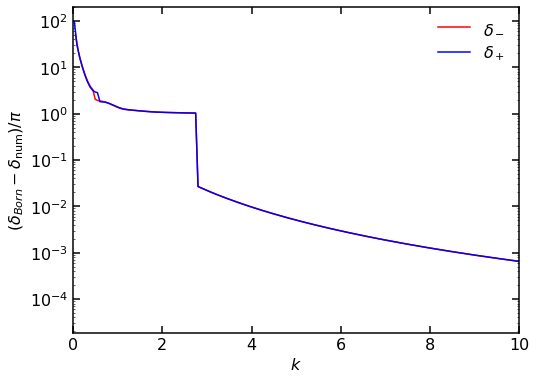

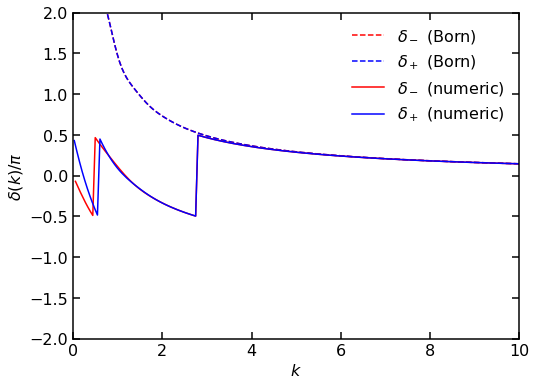

In [32]:
plt.figure(figsize=(8,6))
plt.plot(np.real(kvals_neg), (delta_neg_born - np.real(delta_neg)) / np.pi, label='$\delta_-$',color='red')
plt.plot(np.real(kvals_pos), (delta_pos_born - np.real(delta_pos)) / np.pi, label='$\delta_+$', color='blue')
plt.xlabel('$k$'), plt.ylabel('($\delta_{Born}-\delta_\mathrm{num})/\pi$')
plt.xlim((0, 10))
plt.yscale('log')
plt.legend()

plt.figure(figsize=(8,6))
plt.plot(np.real(kvals_neg), delta_neg_born / np.pi, label='$\delta_-$ (Born)', color='red', linestyle='dashed')
plt.plot(np.real(kvals_pos), delta_pos_born  / np.pi, label='$\delta_+$ (Born)', color='blue', linestyle='dashed')
plt.plot(np.real(kvals_neg), delta_neg / np.pi, label='$\delta_-$ (numeric)', color='red')
plt.plot(np.real(kvals_pos), delta_pos  / np.pi, label='$\delta_+$ (numeric)', color='blue')
plt.xlabel('$k$'), plt.ylabel('$\delta(k)/\pi$')
plt.xlim((0, 10))
plt.ylim(-2, 2)

plt.legend()
plt.show()